# Portfolio Task 4: Logistic Regression

## Introduction

A study on behalf of a business analytics specialised consultancy on a subsample of weekly data from **Fresco Supermarket** to identify trends and patterns in a sample of weekly data collected for a number of their loyalty cardholders.

**The Data:**
- Information on the customers’ `gender`, `age`, `shopping frequency per week` and `shopping basket price`. 
- Types of stores (`convenience` stores and `superstores`) and an `online shopping` platform. 
- The consistency of the customer’s shopping basket regarding the type of products purchased: `value products`, `brand products`, and the supermarket’s own high-quality product series `Fresco Top`. 

**Aim:**
The Fresco marketing management team is only interested in identifying whether the spending of the potential customer will fall into one of two possible groups including:

- `Low spender` (shopping basket value of `£50 or less`)
- `High spenders` (shopping basket `greater than £50`) 

## Tasks

[Part A: Short report for the Head of Fresco Marketing Management](#4_a)

[Part B: Technical report on the various stages of the analysis](#4_b)

## The Project Directory

The Portfolio 4 Project files can be found in the Github Repository: [github.com/lamtong/portfolio4_logistic_regression](https://github.com/lamtong/portfolio4_logistic_regression)

<a name="4_a"></a>
## PART A: A short report for the Head of Fresco Marketing Management

### 1. Executive Summary

**Goals:** 

A Classification Model that identify customers' spending tendency based on their shopping behaviours and individual characteristics. Specifically, predicting whether the spending of the potential customer will fall into the High or Low Spending Groups.

**Key Findings:**

- The most influential factors decide whether a customer is a High or Low Spender: The consistency of their purchases regarding the `Value Products` and `Brand Products` products.
- The Accuracy of the Classification Model: `94.7%`

**Practical Implications:**

- The prediction of customer spending is useful for making marketing strategies, such as suggesting products or promotions that fit a customer's budget. 
- The prediction also helps identify high-value customers, tailor personalised offers, and optimise resource allocation, leading to better customer retention and improved sales performance.

### 2. Data Collection and Methodology

#### 2.1. Data Source:

Weekly data collected for a number of Fresco's loyalty cardholders during a `26-week` period:

- Customer Information: `Gender`, `Age`, `Weekly shopping frequency`, and `Basket Price`. 
- Types of Store: `Convenience`, `Superstores`, or `Online Shopping`. 
- The consistency of shopping basket regarding the type of products: `Value Products`, `Brand Products`, or Fresco's high-quality `Fresco Top`. 

#### 2.2. Data Pre-processing:

- The data is well-structured, with no missing, duplicated or incorrect records.
- There are no abnormalities in the distribution or statistical characteristics of the data.

#### 2.3. Modeling Technique:

`Logistic Regression` is a suitable choice for classifying high and low spending customers:
- The goal is to classify observations into one of two categories "High Spender" and "Low Spender," making logistic regression an ideal fit for this task.
- This method provides the probabilities for each class (the likelihood that a customer will fall into the high spender or low spender group), rather than just the predicted class. 
- This method requires less computational power than other complex models, making it ideal for situations where speed, simplicity and intepertation are important.

### 4. Analysis and Results

**The Percentage of Customers on the provided Data:**

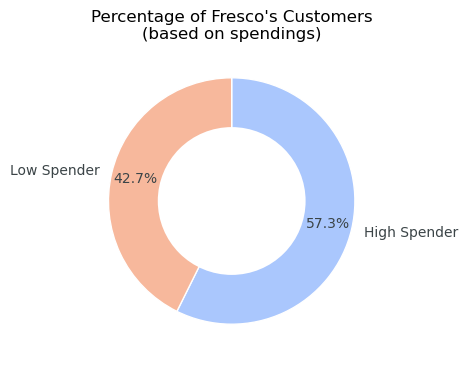

**The Classification Model:**

If $P_{High Spender}$ is the probability that a customer is a `High Spender`, the logit model (for the odds) is:
$$\ln\left(\frac{P_{High Spender}}{1 - P_{High Spender}}\right) = -9.16 + 0.46 \cdot \text{Value Products} + 0.64 \cdot \text{Brand Products}$$

Where:
- *Value Products*: The consistency of the customer’s shopping basket regarding the `Value Products`.
- *Brand Products*: The consistency of the customer’s shopping basket regarding the `Brand Products`.

**Model Results:** 

- The model performs well overall, meeting both adequacy and goodness-of-fit criteria.
- The model achieves an overall accuracy of `94.7%`, with a minimal number of misclassifications for both `High Spender` and `Low Spender`.
- The model is slightly less accurate at identifying all the customers who belong to the `Low Spender` group. 
- The Confusion Matrix of the Model:

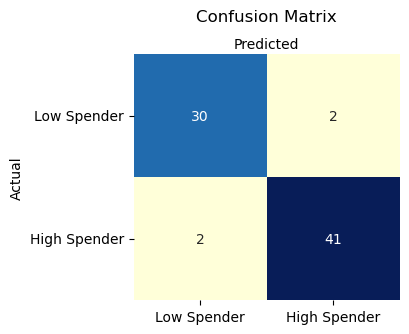

### 5. Recommendations

**Personalised Promotions and Discounts:**
- `High Spenders`: Offer exclusive promotions or loyalty rewards on premium or brand-name products, encouraging continued purchases and reinforcing brand loyalty.
- `Low Spenders`: Provide targeted discounts or bundle deals on value products to increase the frequency and volume of their purchases.

**Cross-Selling:**
- If a `Low Spender` is purchasing value products consistently, offer them discounts or promotions on brand products that pair well with their usual purchases.
- For `High Spender`, cross-sell lower-cost value products that might appeal to their more budget-conscious side, introducing them to a broader range of your product line.

**Optimise Product Availability:**
Ensure that `Value Products` and `Brand Products` are readily available for the customers who consistently buy them.

### 6. Limitations and Areas for Improvements
  
| **Limitations** | **Improvements** |
|---------------|----------------------------|
| **Short Time Frame in Data Collection (`26 weeks`):** Customer spending patterns could vary across different seasons (e.g., holiday periods) or during economic shifts. | Extend the data collection period or add external seasonal factors (e.g., holidays, economic conditions). |
| **Limited Dataset (`75 records`):** A dataset with only 75 records may not provide enough information for the model to accurately identify patterns and relationships between customer behavior and spending categories, increasing the risk of overfitting. | Collect more customer data to increase the sample size or use data augmentation techniques (e.g., SMOTE). |
| **Linearity Assumption of Logistic Regression:** Logistic regression assumes a linear relationship between the independent variables and the log-odds of the dependent variable. If the true relationship is non-linear, the model may fail to capture important patterns in customer behavior. | If the linear relationship assumption is weak, consider other techniques such as Decision Trees, Random Forest, or Gradient Boosting. |


<a name="4_b"></a>
## PART B: The Technical Report on the various stages of the Analysis

### I. Data Pre-processing

In [28]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2

import sys
import os

sys.path.append(os.path.abspath(".."))
from shared_files.custom_plots import plot_props  # Import the customise plot module

import warnings
# Ignore FutureWarnings
warnings.filterwarnings("ignore", 
                        category = FutureWarning)  

# Ignore SettingWithCopyWarning
warnings.simplefilter(action="ignore", 
                      category = pd.errors.SettingWithCopyWarning) 

# Ignore UserWarning
warnings.simplefilter(action="ignore", 
                      category = UserWarning) 

# Ignore ConvergenceWarning
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter(action="ignore", 
                      category = ConvergenceWarning)

In [29]:
# import dataset
df_org = pd.read_excel('Portfolio-Task-1-Short Data_Fresco.xlsx')

#### 1. Nulls and Duplicates handling:

**Missing Values:**

In [30]:
# Number of missing data
print(f'Nulls in the Dataset:\n{df_org.isna().sum()}\n')

Nulls in the Dataset:
CustomerID             0
Shopping Basket        0
Gender                 0
Age                    0
Store Type             0
Value Products         0
Brand Products         0
Top Fresco Products    0
dtype: int64



**Duplicated Records:**

In [31]:
# checking duplicate customer
print(f'Number of Duplicated Customers: {df_org['CustomerID'].duplicated().sum()}')

Number of Duplicated Customers: 0


#### 2. Unique Categorical values:

**Unique labels in the each column:**

In [32]:
# Show Base Data uniques in each column
cat = ['Gender', 'Store Type']

print('Base Data Categorical Values:')
for col in df_org[cat]:
    print(col, df_org[col].unique())

Base Data Categorical Values:
Gender ['Male' 'Female' 'male']
Store Type ['Convenient Stores' 'Superstore' 'Online']


Correct the Gender labels:

In [33]:
# Replace 'male' with 'Male' in the 'Gender' column
df_org['Gender'] = df_org['Gender'].replace('male', 'Male')

#### 3. Numerical Values Distributions:

There is no significant extreme outliers in all numerical variables. However, if necessary, appropriate methods (e.g. rescaling, outlier removal) can be considered to improve the accuracy of the later prediction models.  

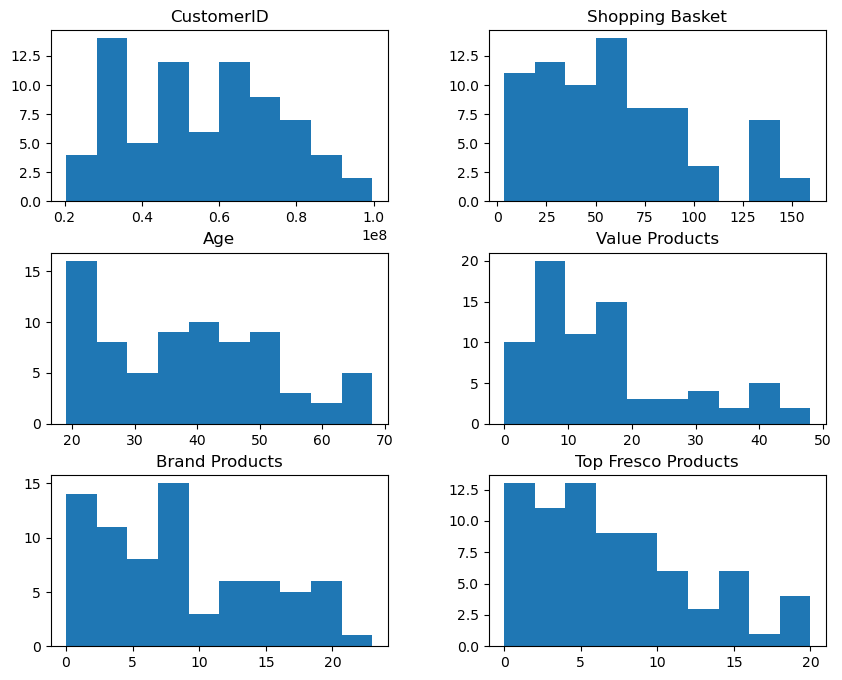

In [34]:
# Histogram of the dataset
df_org.hist(grid    = False,
            figsize = (10, 8));

### II. Portfolio 4 Tasks

#### 1. Fresco's Customer Spending Groups:

Firstly, group customers based on their `Shopping Basket` value:

- `Low spender` (shopping basket value of `£50 or less`).
- `High spenders` (shopping basket `greater than £50`).

In [35]:
# Drop unncessary ID column 
df = df_org.drop(columns = 'CustomerID')

# Add 'high_spender' column (shopping basket value greater than £50)
df['high_spender'] = df['Shopping Basket'] > 50

# Count Spenders
customer_type_counts = df['high_spender'].value_counts()
customer_type_counts

high_spender
True     43
False    32
Name: count, dtype: int64

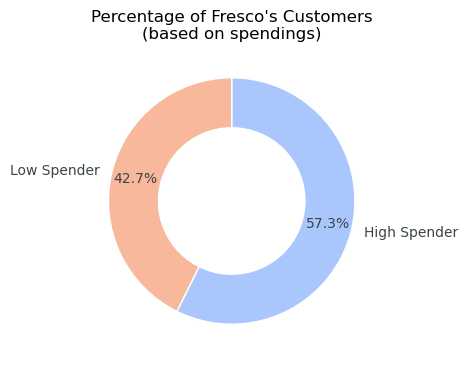

In [36]:
# Colors and labels
colors = sns.color_palette("coolwarm", len(customer_type_counts))
labels = ['High Spender', 'Low Spender']

# Create Donut Chart
plt.figure(figsize=(4, 4))
wedges, texts, autotexts = plt.pie(customer_type_counts, 
                                   labels       = labels, 
                                   autopct      = '%1.1f%%', 
                                   colors       = colors, 
                                   pctdistance  = 0.8,
                                   startangle   = 90, 
                                   counterclock = False, 
                                   wedgeprops   = {'edgecolor': 'white', 'linewidth': 1},
                                   textprops    = {'color': '#3b4447'})

# Add a white circle in the center
center_circle = plt.Circle((0, 0), 0.6, fc='white')
plt.gca().add_artist(center_circle)

# Title and display
plt.title("Percentage of Fresco's Customers\n(based on spendings)")
plt.show()

**Comments:**
- The proportion of `High Spenders` (`57.3%`) being higher than `Low Spenders` (`42.7%`) indicates opportunities to further engage and retain high spenders while exploring strategies to convert low spenders into higher spenders.
- Since both classes are relatively balanced, there’s no immediate need to address class imbalance for predictive modeling (e.g., using SMOTE or other resampling techniques).

#### 2. Logistic Regression Models

To predict the spending of a potential customer will fall into one of the two groups: 
- `Low spender` (shopping basket value of `£50 or less`)
- `High spenders` (shopping basket `greater than £50`) 

##### 2.1. Dependent and Independent Variables:

**Dependent Variable:** `high_spender`, whether or not a customer have their shopping basket `greater than £50` or not. 

**Independent Variables:** 
- Categorical: `Gender`, `Store Type` with `n-1` dummy variables for `n` categories, and no dummy variable for most popular category.
- Numerical: `Age`, `Value Products`, `Brand Products`, `Top Fresco Products`

##### 2.2. Estimate Model:

The intial Logistic Regression Model with all avaiable Features (Independent Variables):
- Keep Contiuous Variables
- Dummify Categorical Variables (`Gender` and `Store Type`) with no dummy variable for most porpular categories.

**Independent Variables Processing:**

In [37]:
# Show Value Count of categorical 'Store Type' and 'Gender' variables
print(df['Store Type'].value_counts())
print(df['Gender'].value_counts())

Store Type
Superstore           34
Online               21
Convenient Stores    20
Name: count, dtype: int64
Gender
Male      39
Female    36
Name: count, dtype: int64


In [38]:
# One-hot encoding the categorical 'Store Type' and 'Gender' columns
df_encoded = pd.get_dummies(df, columns = ['Gender', 'Store Type'])

**Fit the Estimate Logistic Regression Model:**

In [39]:
# Feature names, excluding dummy variables to address multicolinerity
feature_cols = ['Gender_Female', 'Age', 'Store Type_Online', 
                'Store Type_Convenient Stores', 'Brand Products',
                'Top Fresco Products'] # feature names

X = df_encoded[feature_cols].astype(int) # Features / Independent Variables
y = df_encoded['high_spender'].astype(int)  # Target / Dependent Variable

# Add an intercept (constant) column
X_const = sm.add_constant(X)

# Fit logistic regression model using statsmodels
logit_model = sm.Logit(y, X_const)
result_0 = logit_model.fit()

         Current function value: 0.134942
         Iterations: 35


In [40]:
# Display summary (includes coefficients, standard errors, Wald statistics, and p-values)
print(result_0.summary())

                           Logit Regression Results                           
Dep. Variable:           high_spender   No. Observations:                   75
Model:                          Logit   Df Residuals:                       68
Method:                           MLE   Df Model:                            6
Date:                Wed, 19 Mar 2025   Pseudo R-squ.:                  0.8022
Time:                        22:00:55   Log-Likelihood:                -10.121
converged:                      False   LL-Null:                       -51.176
Covariance Type:            nonrobust   LLR p-value:                 1.308e-15
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -5.6114      2.821     -1.989      0.047     -11.141      -0.081
Gender_Female                   -1.3438      1.263     -1.064      0.287     

##### 2.3. Parsimony:

**Multicollinearity and Redundancy**:

- `Value Products` have a strong correlations with `Top Fresco Products` and `Brand Products` (`p = 0.72` and `p = 0.75`), there might be multicollinearity between these pairs. 
- The later VIF test will decide if one of them should be exclude in the final model.

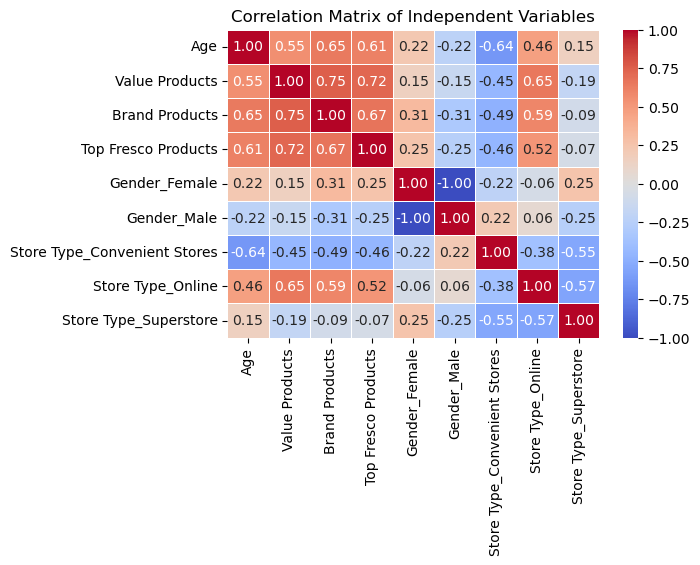

In [41]:
### The Correlation Matrix of Independent Variables ###

# Correlation Matrix of IVs
corr_matrix = df_encoded.drop(columns = ['Shopping Basket', 'high_spender']).corr()
# Set up the matplotlib figure
plt.figure(figsize=(6, 4))

# Draw the heatmap with annotations and a color scale
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the plot
plt.title('Correlation Matrix of Independent Variables')
plt.show()

**The Significance of the Wald statistic for the coefficients:** 

Remove Independent Variables one by one, starting with the most insignificant, and re-estimate the Model:

1. First, exclude `Store Type_Online` with `p = 0.999`. 
2. Next, exclude `Top Fresco Products` as the re-estimated Model have its `p = 0.773`.
3. Next, exclude `Age` as the re-estimated Model have its `p = 0.307`.
4. Next, exclude `Gender_Female` as the re-estimated Model have its `p = 0.576`.
5. Finally, exclude `Store Type_Convenient Stores` as the re-estimated Model have its `p = 0.128`.

**The Parsimonious Model:**

The Model where `2` Independent Variables `Value Products` and `Brand Products` have a signfificant Wald statistic of `0.004` and `0.003`  (lower than `0.05`).

In [42]:
# Parsimonious IVs
feature_cols = ['Value Products',
                'Brand Products'] # feature names

# Ensure all feature columns are numeric
X = df_encoded[feature_cols].astype(int) # Features / Independent Variables

# Add an intercept (constant) column
X_const = sm.add_constant(X)

# Fit logistic regression model using statsmodels
parsi_model = sm.Logit(y, X_const)
result = parsi_model.fit()

# Display summary (includes coefficients, standard errors, Wald statistics, and p-values)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.157523
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:           high_spender   No. Observations:                   75
Model:                          Logit   Df Residuals:                       72
Method:                           MLE   Df Model:                            2
Date:                Wed, 19 Mar 2025   Pseudo R-squ.:                  0.7691
Time:                        22:00:56   Log-Likelihood:                -11.814
converged:                       True   LL-Null:                       -51.176
Covariance Type:            nonrobust   LLR p-value:                 8.039e-18
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -9.1617      2.731     -3.354      0.001     -14.515      -3.808
Value Products  

**Save Residuals & Predicted Output:**

- The `Standardised Residuals`:

$$r_i = \frac{y_i - \hat{p}_i}{\sqrt{\hat{p}_i (1 - \hat{p}_i)}}$$

$Where: \\
r_i = \text{standardised residual for the } i\text{th observation} \\
y_i = \text{actual outcome for the } i\text{th observation (0 or 1)} \\
\hat{p}_i = \text{predicted probability for the } i\text{th observation}$

  
-  `Cook’s Distance`: A measure used for identifying influential data points that have a large effect on the estimated regression coefficients.point.
-  `DFBeta`: Used for assessing the influence of each individual data point on the estimated coefficients. 
  
- Save a record of the predicted categories (`y`) and their probabilities (`y_pred_prob`)

In [43]:
y_pred_prob = result.predict(X_const)    # Predicted Probability
y_pred = (y_pred_prob > 0.5).astype(int) # Predicted labels (threshold = 0.5)
residuals = y - y_pred_prob              # Resdiuals

# Standardized Residuals
std_residuals = (y - y_pred_prob) / np.sqrt(y_pred_prob * (1 - y_pred_prob))

# Cook's Distance
influence = result.get_influence()
cooks_d = influence.cooks_distance[0]
 
# DFBeta
dfbeta = influence.dfbetas

# Combine the results into a DataFrame
results_df = pd.DataFrame({
    'Observed': y,
    'Predicted Probability': y_pred_prob,
    'Standardised Residuals': std_residuals,
    'Cook\'s Distance': cooks_d
})

# DFBeta for each observation
dfbeta_df = pd.DataFrame(dfbeta,
                         columns = X_const.columns)

# Save the results to CSV files
results_df.to_csv('parsimonious_model_results.csv', index=False)
dfbeta_df.to_csv('dfbeta_parsimonious_model_results.csv', index=False)

# Print output indicating the saving of results
print(f"Parsimonious model results saved to 'parsimonious_model_results.csv'.")
print(f"DFBeta results saved to 'dfbeta_parsimonious_model_results.csv'.")

Parsimonious model results saved to 'parsimonious_model_results.csv'.
DFBeta results saved to 'dfbeta_parsimonious_model_results.csv'.


##### 2.4. Model’s Adequacy:

**Standardized Residuals:** 
- Rule 1: `PASS`, `2.67%` of the residuals have absolute values `above 2`, (`less than 5%`)
- Rule 2: `FAIL`, `2.67%` of the residuals have absolute values `above 2.5`, (`more than 1%`). However, `2/75` outliers (`2.67%`) is considered acceptable in this case.
 
**Cook's Distance:** `PASS`, all observations have a Cook's distance `smaller than 1`, the data points do not have undue influence on the model.

**DFBeta:** `PASS`, all DFBeta values are `below 1`, no single observation has a significant impact on the model coefficients.

**Multicollinearity:** `PASS`, there are no features with `VIF > 10` or `Tolerance < 0.1`, suggesting there are multicollinearity issues.

**Conclusion:** Though the Model fails the 2nd Rule of Standardised Residuals with a very small portion of the data points (`2 out of 75`) have residuals that deviate significantly from the expected values, the model passes all other Adequacy rules. We can still conclude that this is a moderately adequate model.

In [44]:
# Check the percentage of observations 
# where the absolute value of the residuals is greater than 2 and 2.5
residuals_above_2 = np.sum(np.abs(std_residuals) > 2) / len(std_residuals) * 100
residuals_above_2_5 = np.sum(np.abs(std_residuals) > 2.5) / len(std_residuals) * 100

# Verify that all Cook's distances are less than 1
cooks_d_above_1 = np.sum(cooks_d > 1) / len(cooks_d) * 100

# Ensure that the DFBeta values are less than 1
dfbeta_above_1 = np.sum(np.abs(dfbeta) > 1) / len(dfbeta) * 100

# VIF Calculation for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Tolerance is the inverse of VIF
vif_data['Tolerance'] = 1 / vif_data['VIF']

print(f"- Observations with Standardised Residuals > 2: {residuals_above_2:.2f}%")
print(f"- Observations with Standardised Residuals > 2.5: {residuals_above_2_5:.2f}%")
print(f"- Observations with Cook's distance > 1: {cooks_d_above_1:.2f}%")
print(f"- Observations with DFBeta > 1: {dfbeta_above_1:.2f}%")

print("\nVariance Inflation Factor (VIF) and Tolerance statistics:")
print(vif_data)

- Observations with Standardised Residuals > 2: 2.67%
- Observations with Standardised Residuals > 2.5: 2.67%
- Observations with Cook's distance > 1: 0.00%
- Observations with DFBeta > 1: 0.00%

Variance Inflation Factor (VIF) and Tolerance statistics:
          Feature       VIF  Tolerance
0           const  3.107086   0.321845
1  Value Products  2.297443   0.435266
2  Brand Products  2.297443   0.435266


##### 2.5. Logistic Regression Assumptions:

**Linearity Assumption:** `PASS`. The p-values for the interactions of all independent variables with their natural logs, specifically `Brand Products_ln_interaction` and `Value Products_ln_interaction`, are `0.213` and `0.164`, respectively (both `greater than 0.05`), indicating that the linearity assumption for the independent variables is satisfied.

In [45]:
# Continuous variables
continuous_var = ['Brand Products', 'Value Products']

# Natural log (ln) of variables
for var in continuous_var:
    df_encoded[f'ln_{var}'] = np.log(df_encoded[var] + 1)  # Add 1 to avoid log(0)
    
# Interaction terms between each variable and its ln transformation
for var in continuous_var:
    df_encoded[f'{var}_ln_interaction'] = df_encoded[var] * df_encoded[f'ln_{var}']

# Feature columns
feature_cols = continuous_var[:] 
for var in continuous_var:
    feature_cols.append(f'ln_{var}')  # Ln-transformed variable
    feature_cols.append(f'{var}_ln_interaction')  # Interactions
    
# Target variable
y = df_encoded['high_spender'].astype(int)

# Features
X_ln = df_encoded[feature_cols].astype(float)  # Ensure numeric
X_ln_const = sm.add_constant(X_ln)

# Fit the logistic regression model
logit_model = sm.Logit(y, X_ln_const)
result_logit = logit_model.fit()

# Display summary (check p-values, coefficients, etc.)
print(result_logit.summary())

Optimization terminated successfully.
         Current function value: 0.110023
         Iterations 18
                           Logit Regression Results                           
Dep. Variable:           high_spender   No. Observations:                   75
Model:                          Logit   Df Residuals:                       68
Method:                           MLE   Df Model:                            6
Date:                Wed, 19 Mar 2025   Pseudo R-squ.:                  0.8388
Time:                        22:00:56   Log-Likelihood:                -8.2517
converged:                       True   LL-Null:                       -51.176
Covariance Type:            nonrobust   LLR p-value:                 2.201e-16
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          -629.0457    340.809     -1.846      0

**Independence of Errors Assumptions:** `PASS`, The ratio between Chi-squared goodness of fit test and its degrees of freedom is `below 2` (`1.09`)

In [46]:
# Calculate the deviance (goodness of fit statistic)
# Deviance = -2 * (log-likelihood of the saturated model - log-likelihood of the fitted model)
deviance = -2 * (result.llnull - result.llf)

# Calculate the degrees of freedom (residual degrees of freedom)
df_resid = result.df_resid

# Compute the chi-squared goodness of fit test ratio
chi_squared_ratio = deviance / df_resid

# Print the chi-squared ratio
print(f"\nChi-squared goodness of fit test ratio: {chi_squared_ratio:.2f}")

# Check if the ratio is below 2
if chi_squared_ratio < 2:
    print("The ratio is below 2, indicating independence of errors.")
else:
    print("The ratio is above 2, indicating potential issues with the independence of errors.")


Chi-squared goodness of fit test ratio: 1.09
The ratio is below 2, indicating independence of errors.


##### 2.6. Goodness of fit:

In [47]:
# -- Following the Guidance in https://en.wikipedia.org/wiki/Pseudo-R-squared --

### Calculate Cox & Snell R2 ###
def r2_cox_snell(LL_null, LL_model, n):
    '''Calculate Cox & Snell R2

    Arguments:
        LL_null 
        LL_model
        n

    Returns:
        Cox & Snell’s R2
    '''
    return 1 - np.exp((LL_null - LL_model) * (2 / n))

### Calulate Nagelkerke R2 ###
def nagel_R2(r2_cox_snell, LL_null, n):
    '''Calulate Nagelkerke R2

    Arguments:
        r2_cox_snell -- Cox & Snell’s R2
        LL_null
        n 

    Returns:
        Nagelkerke’s R2
    '''
    return r2_cox_snell / (1 - np.exp(LL_null * (2 / n)))

### Calculate -2LL ###
def neg_2_LL (LL_model):
    '''Calculate -2LL

    Arguments:
        LL_model

    Returns:
        -2 Log Likelihood (`-2LL`)
    '''
    return -2 * LL_model

**Pseudo R-squared:**
- Cox & Snell’s R2: With a value of `0.65`, the Parsimonious model has a moderatly high explanatory power.

$$R^2_{\text{Cox-Snell}} = 1 - e^{\frac{2(LL_{\text{null}} - LL_{\text{model}})}{n}}$$



In [48]:
LL_null = result.llnull   # Null log-likelihood
LL_model = result.llf     # Model log-likelihood
n = result.nobs           # Number of observations

# Cox and Snell R2
cox_snell_r2 = r2_cox_snell(LL_null, LL_model, n)
print(f'Cox and Snell R2: {cox_snell_r2}')

Cox and Snell R2: 0.6499430813432627


- Nagelkerke’s R2: With a value of `0.873`, the Parsimonious model has a high explanatory power.

$$R^2_{\text{Nagelkerke}} = \frac{R^2_{\text{Cox-Snell}}}{1 - e^{\frac{2LL_{\text{null}}}{n}}}$$

In [49]:
# Nagelkerke R2
print(f'Nagelkerke R2: {nagel_R2(cox_snell_r2, LL_null, n)}')

Nagelkerke R2: 0.8729410224454226


**Hosmer and Lemeshow’s test:** 

A statistical test used to assess the goodness-of-fit for a logistic regression model, comparing the observed and expected frequencies of events: 


$$\chi^2_{G-2} = \sum_{j=1}^{G} \frac{(O_j - E_j)^2}{E_j(1 - E_j/n_j)}$$
$
Where: \\
\chi^2 \text{ = Chi Squared} \\
O_j \text{ = observed frequency of events in group } j \\
E_j \text{ = expected frequency of events in group } j \\
n_j \text{ = number of observations in group } j \\
G \text{ = total number of groups (usually 10)}
$

Conclusions:
- With significance of the test of `0.993` we can conclude that this model is not poorly fitted. 
- Though `0.993` is a very high score, due to the limitations of Hosmer and Lemeshow's Test, such as its sensitivity to sample size and grouping choices, it may not always provide a reliable assessment of model fit. 
- Therefore, while the result suggests a good fit, it's important to consider other methods (e.g. AIC, BIC, etc.) to ensure the robustness of the model.

In [50]:
# -- Following the Hosmer-Lemeshow Test Guide in: https://www.statisticshowto.com/hosmer-lemeshow-test/ --

# Sort the prediction dataframe by predicted probabilities
hosmer_df = results_df.sort_values(by = 'Predicted Probability')

# 10 groups, df = g - 2 = 8
num_groups = 10

# Split the data into 'num_groups' groups based on predicted probabilities
hosmer_df['Group'] = pd.qcut(hosmer_df['Predicted Probability'], num_groups, labels=False)

# Observed and expected values for each group
observed = hosmer_df.groupby('Group')['Observed'].sum().to_frame()
expected = hosmer_df.groupby('Group')['Predicted Probability'].sum().to_frame()

# Merge observe and expected sets
hos = pd.merge(observed, 
               expected, 
               left_index  = True, 
               right_index = True)

# Iterate
x2 = 0                                  # chi squared
for index, row in hos.iterrows():
    o = row['Observed']                 #oj: number of observed cases in the jth group.
    e = row['Predicted Probability']    #ej: number of expected cases in the jth group.
    
    x2 += ((o - e) ** 2) / (e * (1 - (e / num_groups))) # Calculate x2

# Final chi-square statistic
print(f"Chi-square statistic: {x2}")
# p-value
p_value = chi2.sf(x2, num_groups - 2)
print(f"Hosmer Lemeshow test p-value: {p_value}")

Chi-square statistic: 1.4510994139648299
Hosmer Lemeshow test p-value: 0.9934904245867127


**Classification Accuracy:**

- The Overall Classification Accuracy is `94.7%`, which is very high.
- The Precision and Recall of both `Low Spender`, `High Spender` are very high. Indicating a low in both False Positives and False Negatives in the predictions.
- A marginal lower Recall for `Low Spender` (`0.94` vs. `0.95` for `High Spender`) suggests that the model may miss a few low spenders

The Classification Report:

In [51]:
# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Overall Accuracy: {accuracy:.4f}\n")

# Generate classification report
report = classification_report(y, 
                               y_pred, 
                               target_names = ['Low Spender', 'High Spender'])
print(report)

Overall Accuracy: 0.9467

              precision    recall  f1-score   support

 Low Spender       0.94      0.94      0.94        32
High Spender       0.95      0.95      0.95        43

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



The Confusion Matrix:

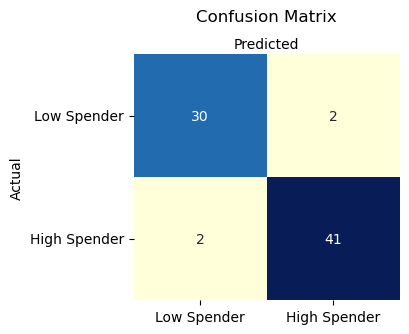

In [52]:
# Confusion matrix
cnf_matrix = confusion_matrix(y, y_pred)

class_names = [0, 1]  # name of classes
fig, ax = plt.subplots(figsize=(4, 3))
tick_marks = np.arange(len(class_names))

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), 
            annot   = True, 
            cmap    = "YlGnBu", 
            fmt     = 'g', 
            ax      = ax, 
            cbar    = False)

# Set the ticks and labels
ax.set_xticks(tick_marks + 0.5)
ax.set_yticks(tick_marks + 0.5)  
ax.set_xticklabels(['Low Spender', 'High Spender'], rotation=0, ha='center')  
ax.set_yticklabels(['Low Spender', 'High Spender'], rotation=0, va='center')  

# Set label position and other properties
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')  
plt.xlabel('Predicted') 
plt.show()

##### 2.7. The Final Model:

The Final Model consists of `2` Independent Variables:
- `Value Products`: The consistency of the customer’s shopping basket regarding the Value Products.
- `Brand Products`: The consistency of the customer’s shopping basket regarding the Brand Products.

If `P` is the probability that a customer is a high spender, the logit model (for the odds) is:
$$\ln\left(\frac{P}{1 - P}\right) = -9.16 + 0.46 \cdot \text{Value Products} + 0.64 \cdot \text{Brand Products}$$

- The model performs well overall and satisfies all logistic regression assumptions except for one related to standard residuals. However, its adequacy and goodness of fit is still very strong.

- The model achieves an Overall Accuracy of `94.7%`, with high Precision and Recall for both `Low Spender` and `High Spender` categories.
